# Directing Customers to Subscription

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

In [2]:
df = pd.read_csv("new_appdata10.csv")

In [3]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [6]:
df2 = df.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [7]:
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


<Figure size 432x288 with 0 Axes>

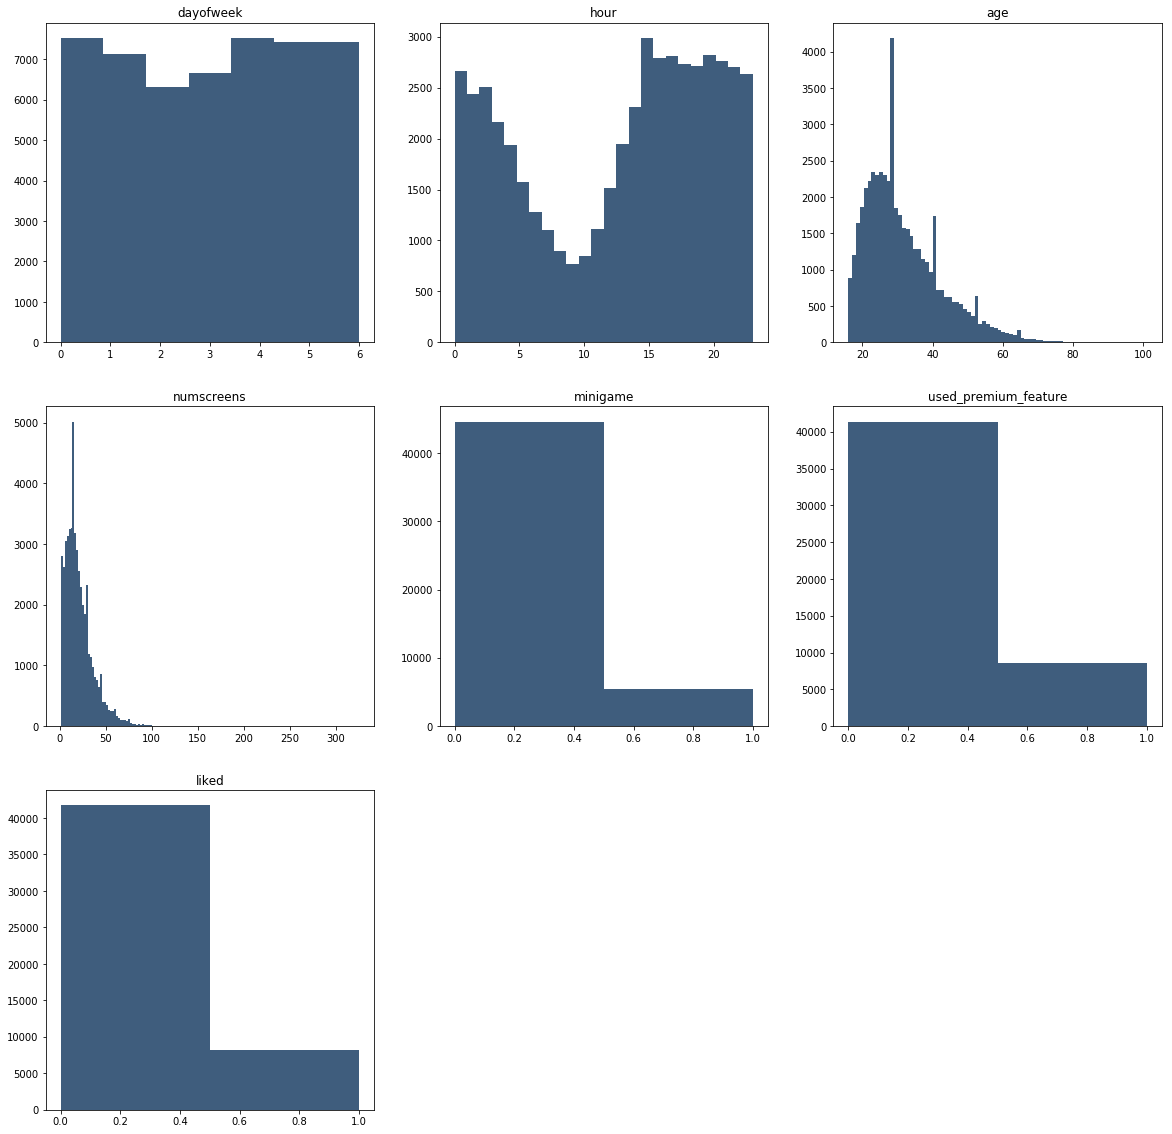

In [8]:
plt.suptitle('Histogram of Numerical Columns', fontsize=20)
plt.figure(figsize=(20,20))
for i in range(1,df2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df2.columns.values[i - 1])
    
    vals = np.size(df2.iloc[:, i - 1].unique())
    
    plt.hist(df2.iloc[:,i-1], bins = vals, color = '#3F5D7D')

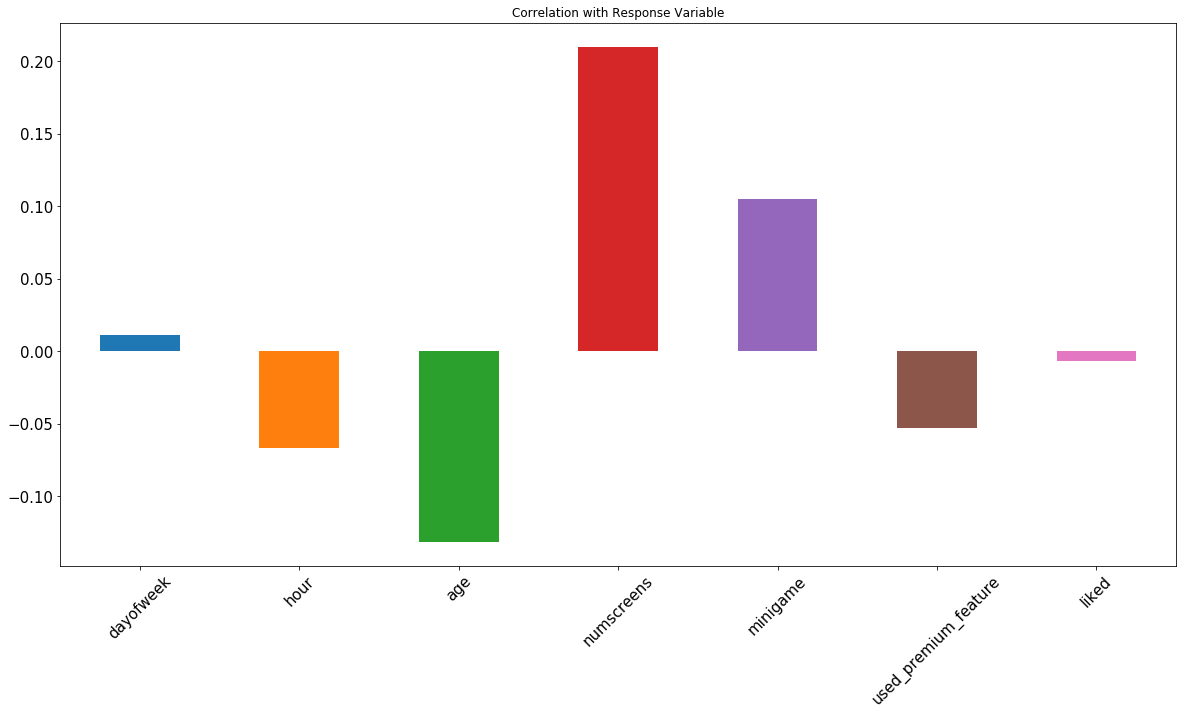

In [9]:
df2.corrwith(df.enrolled).plot.bar(figsize=(20,10),
                                  title= 'Correlation with Response Variable',
                                  fontsize= 15, rot=45)

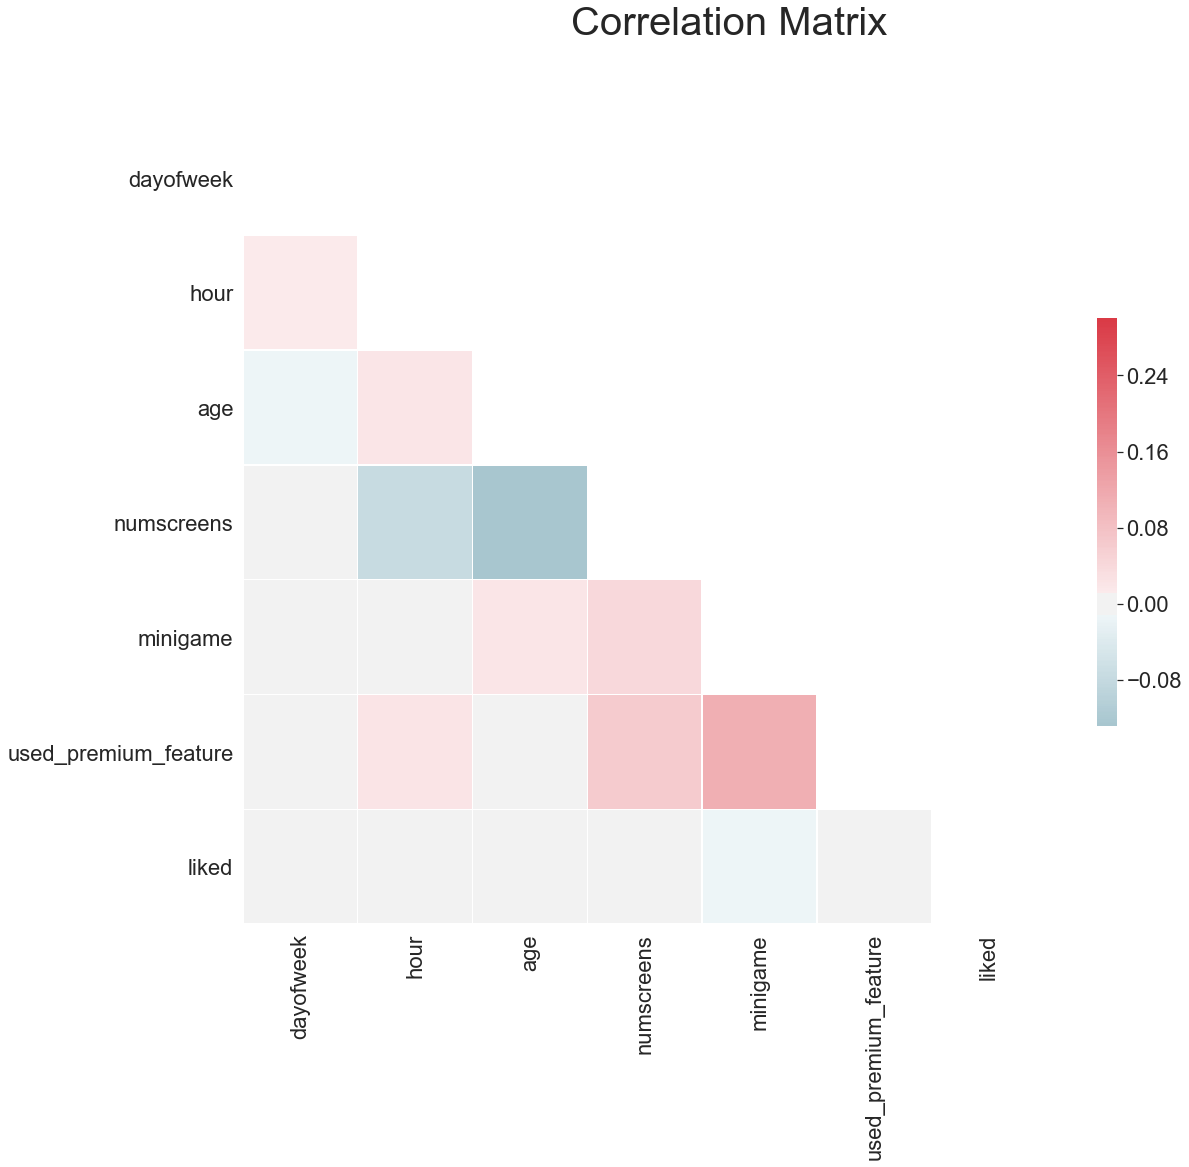

In [10]:
sns.set(style="white", font_scale=2)
corr = df2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix", fontsize = 40)

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={'shrink':0.5})

In [11]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
df['first_open'] = [parser.parse(row_data) for row_data in df['first_open']]

In [13]:
df['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in df['enrolled_date']]

In [14]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

## Determine the cutoff period for the model, otherwise, the only way to prove that the model is correct is to wait until the end of time.

In [15]:
df['difference'] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

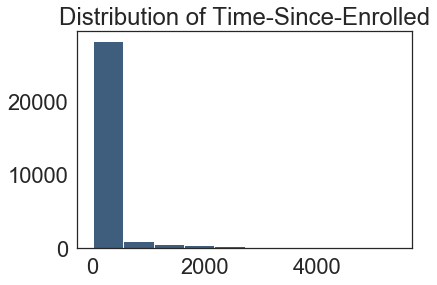

In [16]:
plt.hist(df['difference'].dropna(), color = "#3f5d7d")
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

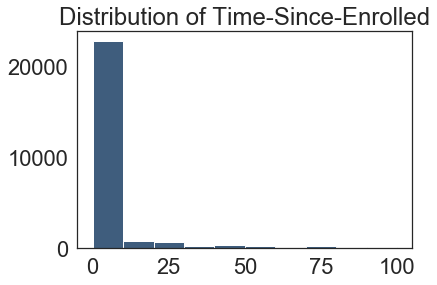

In [17]:
plt.hist(df['difference'].dropna(), color = "#3f5d7d", range=[0,100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [18]:
df.loc[df.difference > 48, 'enrolled'] = 0

In [19]:
df = df.drop(columns=['difference', 'enrolled_date', 'first_open'])

## Feature Engineering: screen_list
### 

In [20]:
top_screens =  pd.read_csv('top_screens.csv').top_screens.values

In [21]:
df['screen_list'] = df.screen_list.astype(str) + ','

In [22]:
for sc in top_screens:
    df[sc]=df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+",", "")

In [23]:
df['Other'] = df.screen_list.str.count(",")
df = df.drop(columns=['screen_list'])

In [24]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [25]:
savings_screens = ['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']

In [26]:
df['SavingsCount'] = df[savings_screens].sum(axis=1)

In [27]:
df = df.drop(columns=savings_screens)

In [28]:
def wordcontain(kata):
    theDict=[]
    for i in df.columns:
        if kata in i:
            theDict.append(i)
    return theDict

In [29]:
credit_screens = wordcontain('Credit')
df['CMCount'] = df[credit_screens].sum(axis=1)
cc_screens = wordcontain('CC')
df['CCCount'] = df[cc_screens].sum(axis=1)
loan_screens = wordcontain('Loan')
df['LoansCount'] = df[loan_screens].sum(axis=1)

In [30]:
df = df.drop(columns=credit_screens)

In [31]:
df = df.drop(columns=cc_screens)

In [32]:
df = df.drop(columns=loan_screens)

In [33]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [34]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [35]:
df.to_csv("newest_appdata10.csv", index=False)